In [1]:
# Created 7Apr23
# Imports csv of S0 (PJua simulation results) and LCUE & Emissions df generated before
# Selects subset of sites with Unmet_energy_fraction == 0 from S0 (124 sites)
# Saves them in a list to be able to plot only subset of those sites LCUE and emissions
# Separates by institution type too
# check Python version: 'subset_unmet0.py'
# check excel: 'S0-S4 analysis and check'
# plots to add in Ch. 4 analysis 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Move to path where csv are saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs"

cwd = os.getcwd()
cwd

os.chdir(path) # or put the whole path
os.getcwd()   # or put pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs'

In [2]:
# Imports/reads csv of S0 to look for sites with Unmet_energy_fraction of 0
s0 = pd.read_csv("Simu_res_S0_inst.csv")

# Get new df with subset of data based on a condition of a column
# in this case is the sites of Unmet_energy_fraction == 0
subset_df = s0[s0["Unmet_energy_fraction"] == 0]

In [3]:
# Save the Site_name of sites in this subset as a list
subset_list = subset_df.Site_name.values.tolist()
print(subset_list)    # should be 124 in this case (124 sites with unmet of 0 in S0)

['AIC_Nadoto_Primary_School', 'AIC_Nayanaekaton_Primary_School', 'A_IC_Gangani_Primary_School', 'Abagarse_Primary_School', 'Akadeli_Primary_School', 'Akili_Primary_School', 'Bahero_Primary_School', 'Balaga_Primary_School', 'Bomani_Primary_School', 'Boyani_Dispensary', 'Boyani_West_Primary_School', 'Busa_Dispensary', 'Chidzaya_Primary_School', 'Chingombero_Dispensary', 'Daaba_Primary_School', 'Dadachabasa_Primary_School', 'Dera_Tumaini_Primary_School', 'Dighai_Primary_School', 'Dzendereni_Primary_School', 'Dzombo_Primary_School', 'Ekoropus_Primary_School', 'Elsa_Primary_School', 'Fudumulo_Primary_School', 'Galmadido_Primary_School', 'Gamachu_Primary_School', 'Garbatula_Primary_Boarding', 'Gozani_Primary_School', 'Hawe_Wanje_Primary_School', 'Isiolo_Samburu_Complex_Dispensary', 'Isiolo_Samburu_Complex_Primary_School', 'Jezazhomu_Primary_School', 'Jitegemee_Primary_School', 'Kaalem_Primary_School', 'Kadunguni_Primary_School', 'Kalokoda_Primary_School', 'Kaluweni_Primary_School', 'Karyaka_

In [4]:
# Imports/reads csv of LCUE of S0-S4 (created with another code)
lcue_s0_s4 = pd.read_csv("lcue_s0_s4.csv")

In [5]:
# Creates new df including only subset of sites on subset_list:
lcue_subset = lcue_s0_s4[lcue_s0_s4["Site_name"].isin(subset_list)]
lcue_subset # to show in Jupyter

,Site_name,County,Institution,S0_LCUE,S1_LCUE,S2_LCUE,S3_LCUE,S4_LCUE
0,AIC_Nadoto_Primary_School,Turkana,School,1.786,1.519,1.306,1.123,1.076
1,AIC_Nayanaekaton_Primary_School,Turkana,School,2.276,1.470,1.291,1.206,1.206
2,A_IC_Gangani_Primary_School,Kwale,School,1.328,0.858,0.858,0.787,0.787
3,Abagarse_Primary_School,Isiolo,School,2.510,1.518,1.327,1.327,1.327
4,Akadeli_Primary_School,Isiolo,School,1.052,0.807,0.640,0.605,0.605
...,...,...,...,...,...,...,...,...
159,Uhuru_Primary_School,Isiolo,School,1.901,1.460,1.238,1.238,1.143
160,Vithunguni_Primary_School,Kilifi,School,2.338,1.699,1.417,1.248,1.248
161,Watala_Primary_School,Kilifi,School,1.906,1.642,1.503,1.378,1.362
164,Ziwani_Primary_School,Kilifi,School,2.513,1.930,1.837,1.679,1.679


In [7]:
lcue_subset.info  # to check is only 124 rows or sites 

<bound method DataFrame.info of                            Site_name   County Institution  S0_LCUE  S1_LCUE  \
0          AIC_Nadoto_Primary_School  Turkana      School    1.786    1.519   
1    AIC_Nayanaekaton_Primary_School  Turkana      School    2.276    1.470   
2        A_IC_Gangani_Primary_School    Kwale      School    1.328    0.858   
3            Abagarse_Primary_School   Isiolo      School    2.510    1.518   
4             Akadeli_Primary_School   Isiolo      School    1.052    0.807   
..                               ...      ...         ...      ...      ...   
159             Uhuru_Primary_School   Isiolo      School    1.901    1.460   
160        Vithunguni_Primary_School   Kilifi      School    2.338    1.699   
161            Watala_Primary_School   Kilifi      School    1.906    1.642   
164            Ziwani_Primary_School   Kilifi      School    2.513    1.930   
165       Ziyaradundo_Primary_School    Kwale      School    0.772    0.719   

     S2_LCUE  S3_LC

In [8]:
# Set style to plot
sns.set(rc={"figure.dpi":300})
sns.set_context("notebook")
#sns.set_style("ticks") # with axis ticks, no background lines
sns.set_style("whitegrid") # no axis ticks, with background lines

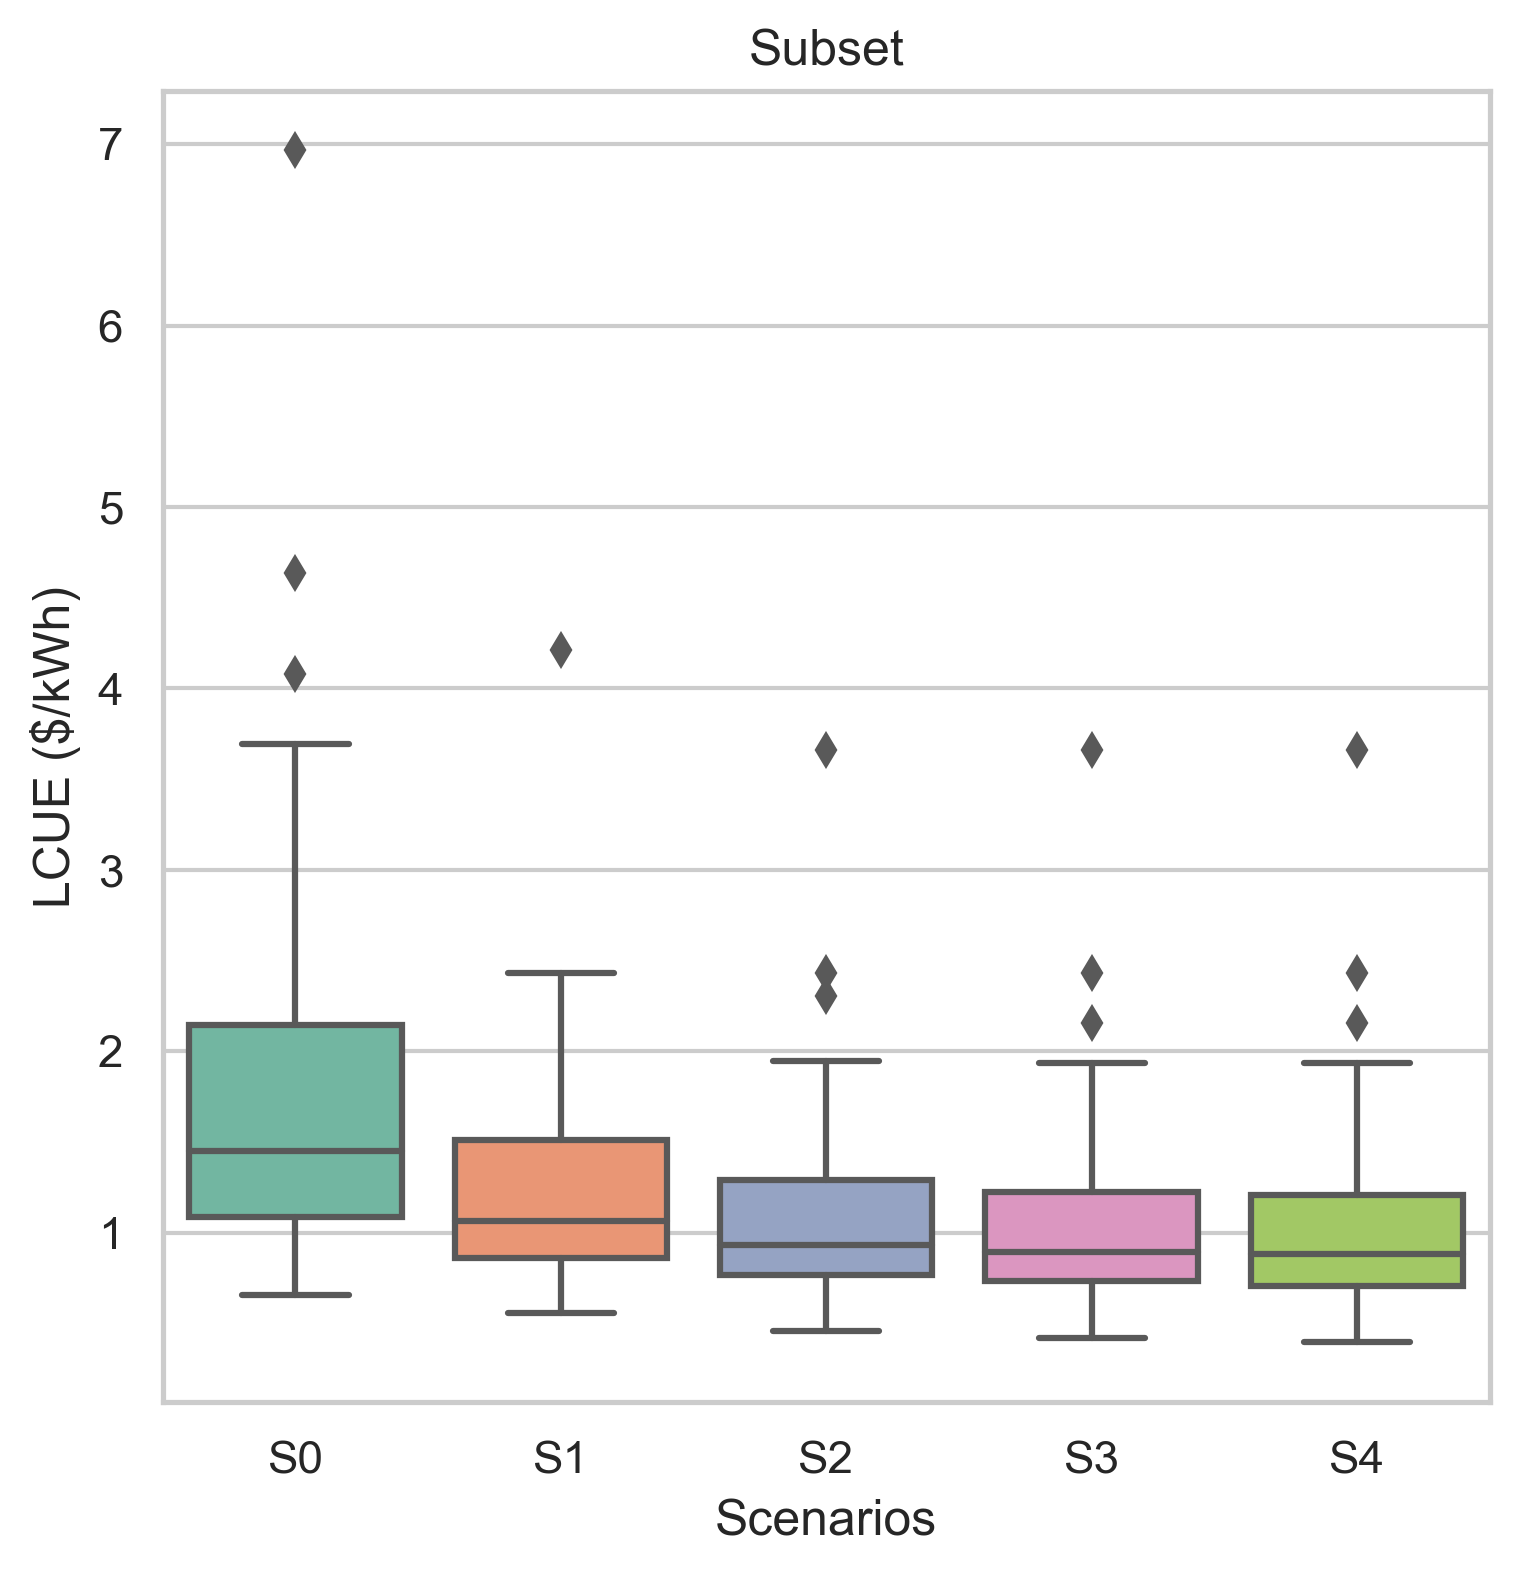

In [10]:
# Plot subset of LCUE sites that had Unmet_energy_fraction == 0 in S0 (124 sites)
g = sns.catplot(
    data=lcue_subset, kind= "box", palette= "Set2")  # change to violin
g.set(xlabel= "Scenarios", ylabel= "LCUE ($/kWh)")
#g.set(ylim=(0, 3)) # to get rid of outlier
g.set_xticklabels(["S0", "S1", "S2", "S3", "S4"])
g.set(title="Subset")
sns.despine(top=False, right=False)

In [11]:
# Separate df by Institution type (by Clinics LCUE)
lcue_subset_clinics = lcue_subset[lcue_subset.Institution != 'School']
lcue_subset_clinics

,Site_name,County,Institution,S0_LCUE,S1_LCUE,S2_LCUE,S3_LCUE,S4_LCUE
13,Boyani_Dispensary,Kilifi,Clinic,0.869,0.644,0.470,0.434,0.434
16,Busa_Dispensary,Kwale,Clinic,0.976,0.797,0.654,0.567,0.519
18,Chingombero_Dispensary,Kwale,Clinic,1.149,0.781,0.646,0.577,0.564
39,Isiolo_Samburu_Complex_Dispensary,Isiolo,Clinic,1.052,0.920,0.772,0.663,0.616
54,Kavunyalo_Dispensary,Kilifi,Clinic,0.658,0.606,0.459,0.420,0.397
78,Mabesheni_Dispensary,Kwale,Clinic,0.756,0.560,0.485,0.441,0.441
86,Makamini_Dispensary,Kwale,Clinic,1.988,1.165,0.870,0.743,0.743
98,Mazola_Dispensary,Kwale,Clinic,1.450,0.926,0.747,0.690,0.639
102,Mbulia_Dispensary,Taita_Taveta,Clinic,2.160,0.991,0.890,0.890,0.880
120,Mtumwa_Dispensary,Kwale,Clinic,0.706,0.655,0.543,0.493,0.472


In [12]:
# returns LCUE df of only clinics (13 sites/count)
lcue_subset_clinics.describe().round(3)

,S0_LCUE,S1_LCUE,S2_LCUE,S3_LCUE,S4_LCUE
count,13.000,13.000,13.000,13.000,13.000
mean,1.092,0.773,0.627,0.562,0.542
std,0.485,0.180,0.150,0.145,0.143
min,0.658,0.560,0.459,0.420,0.397
25%,0.788,0.644,0.526,0.453,0.441
50%,0.869,0.733,0.556,0.493,0.472
75%,1.149,0.920,0.747,0.663,0.616
max,2.160,1.165,0.890,0.890,0.880


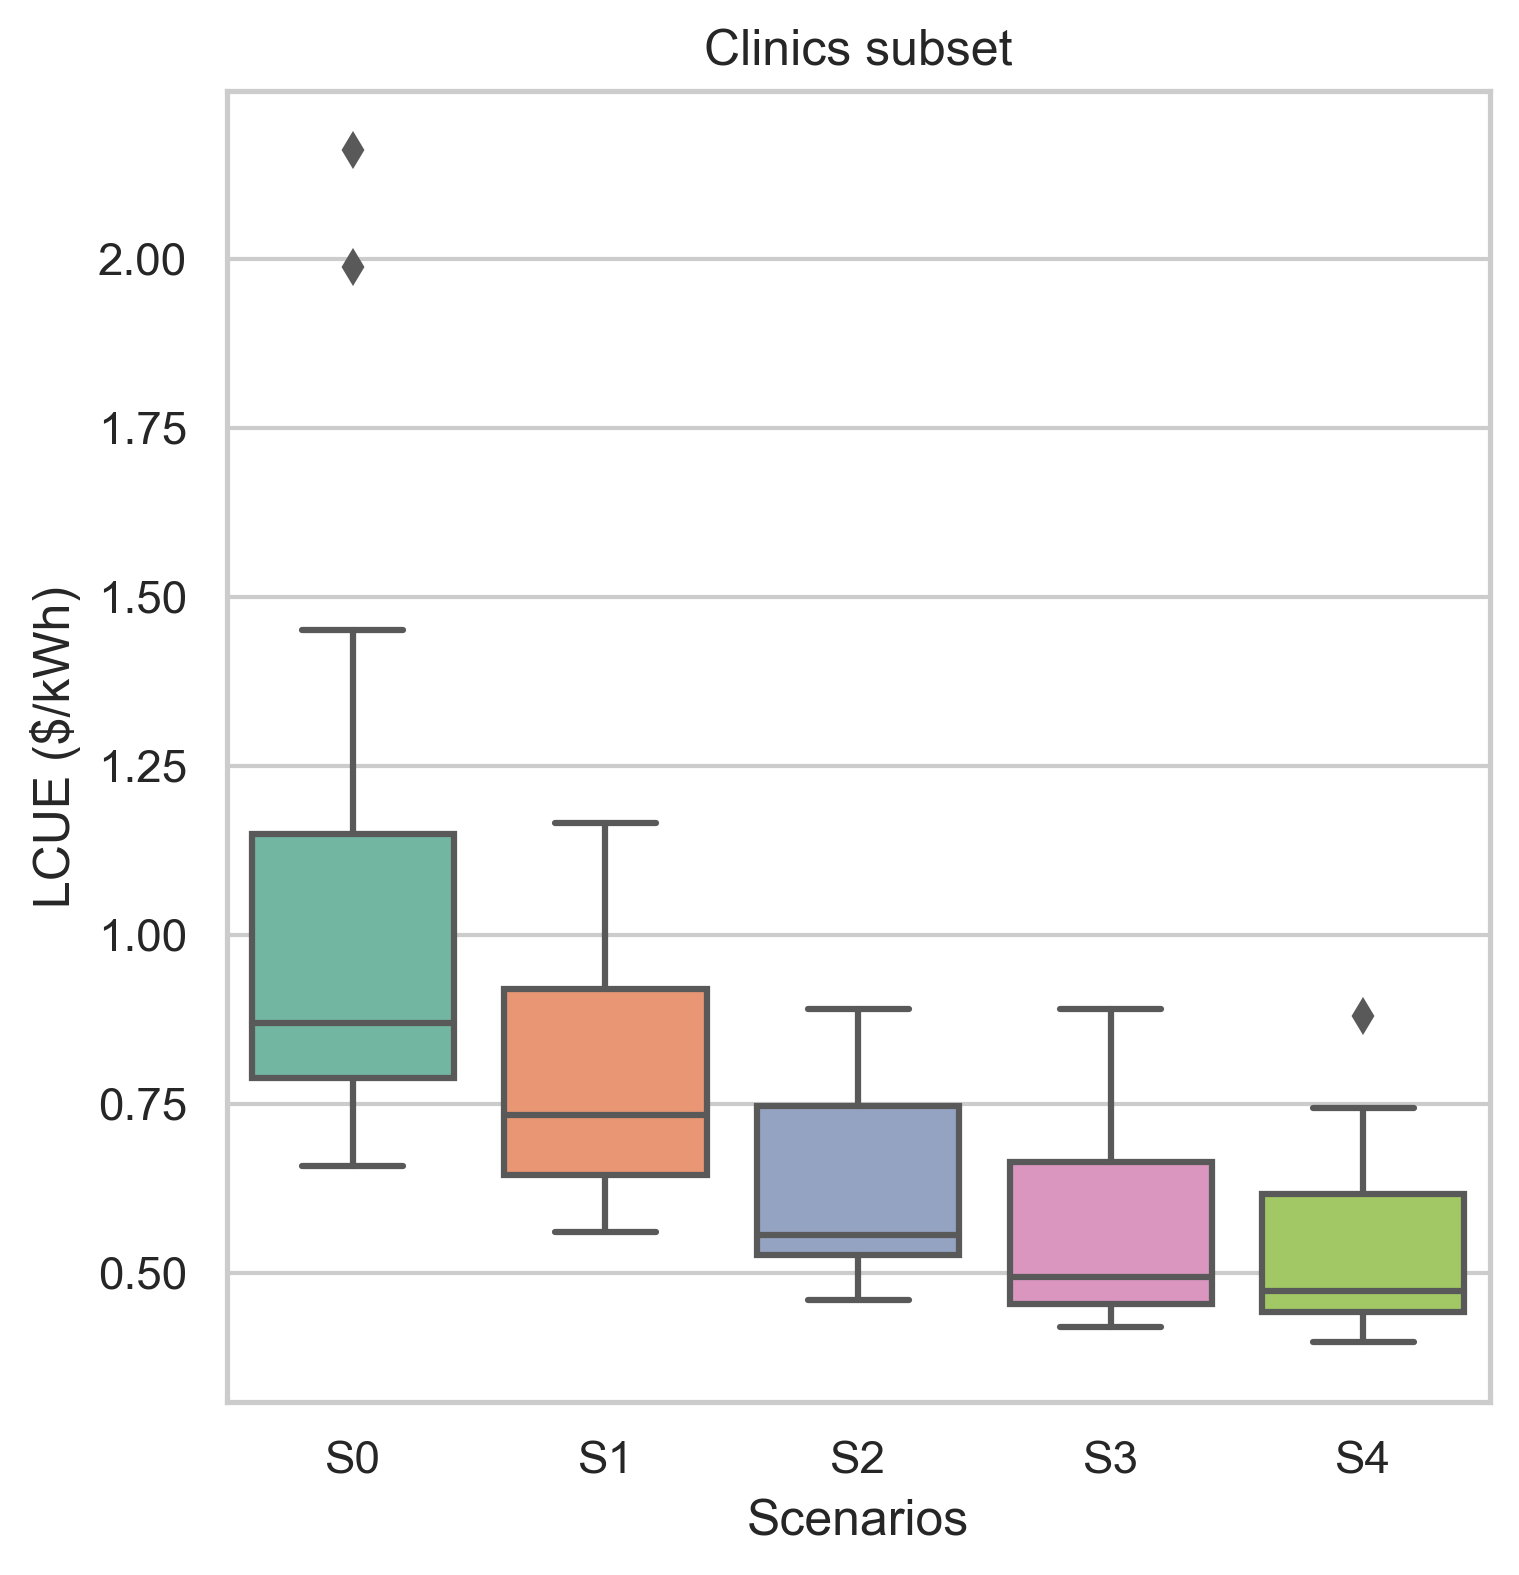

In [13]:
# Plot subset of LCUE clinics (n=13)
g = sns.catplot(
    data=lcue_subset_clinics, kind= "box", palette= "Set2")  # change to violin
g.set(xlabel= "Scenarios", ylabel= "LCUE ($/kWh)")
#g.set(ylim=(0, 3)) # to get rid of outlier
g.set_xticklabels(["S0", "S1", "S2", "S3", "S4"])
g.set(title="Clinics subset")
sns.despine(top=False, right=False)

In [14]:
# to separate df by Institution type (by Schools LCUE)
lcue_subset_schools = lcue_subset[lcue_subset.Institution != 'Clinic']

# returns LCUE df of only schools (111 sites/count)
lcue_subset_schools.describe().round(3)

,S0_LCUE,S1_LCUE,S2_LCUE,S3_LCUE,S4_LCUE
count,111.000,111.000,111.000,111.000,111.000
mean,1.786,1.271,1.134,1.072,1.056
std,0.936,0.509,0.465,0.456,0.459
min,0.745,0.634,0.546,0.518,0.510
25%,1.154,0.910,0.813,0.767,0.752
50%,1.516,1.102,0.983,0.935,0.924
75%,2.258,1.532,1.340,1.250,1.250
max,6.965,4.212,3.659,3.659,3.659


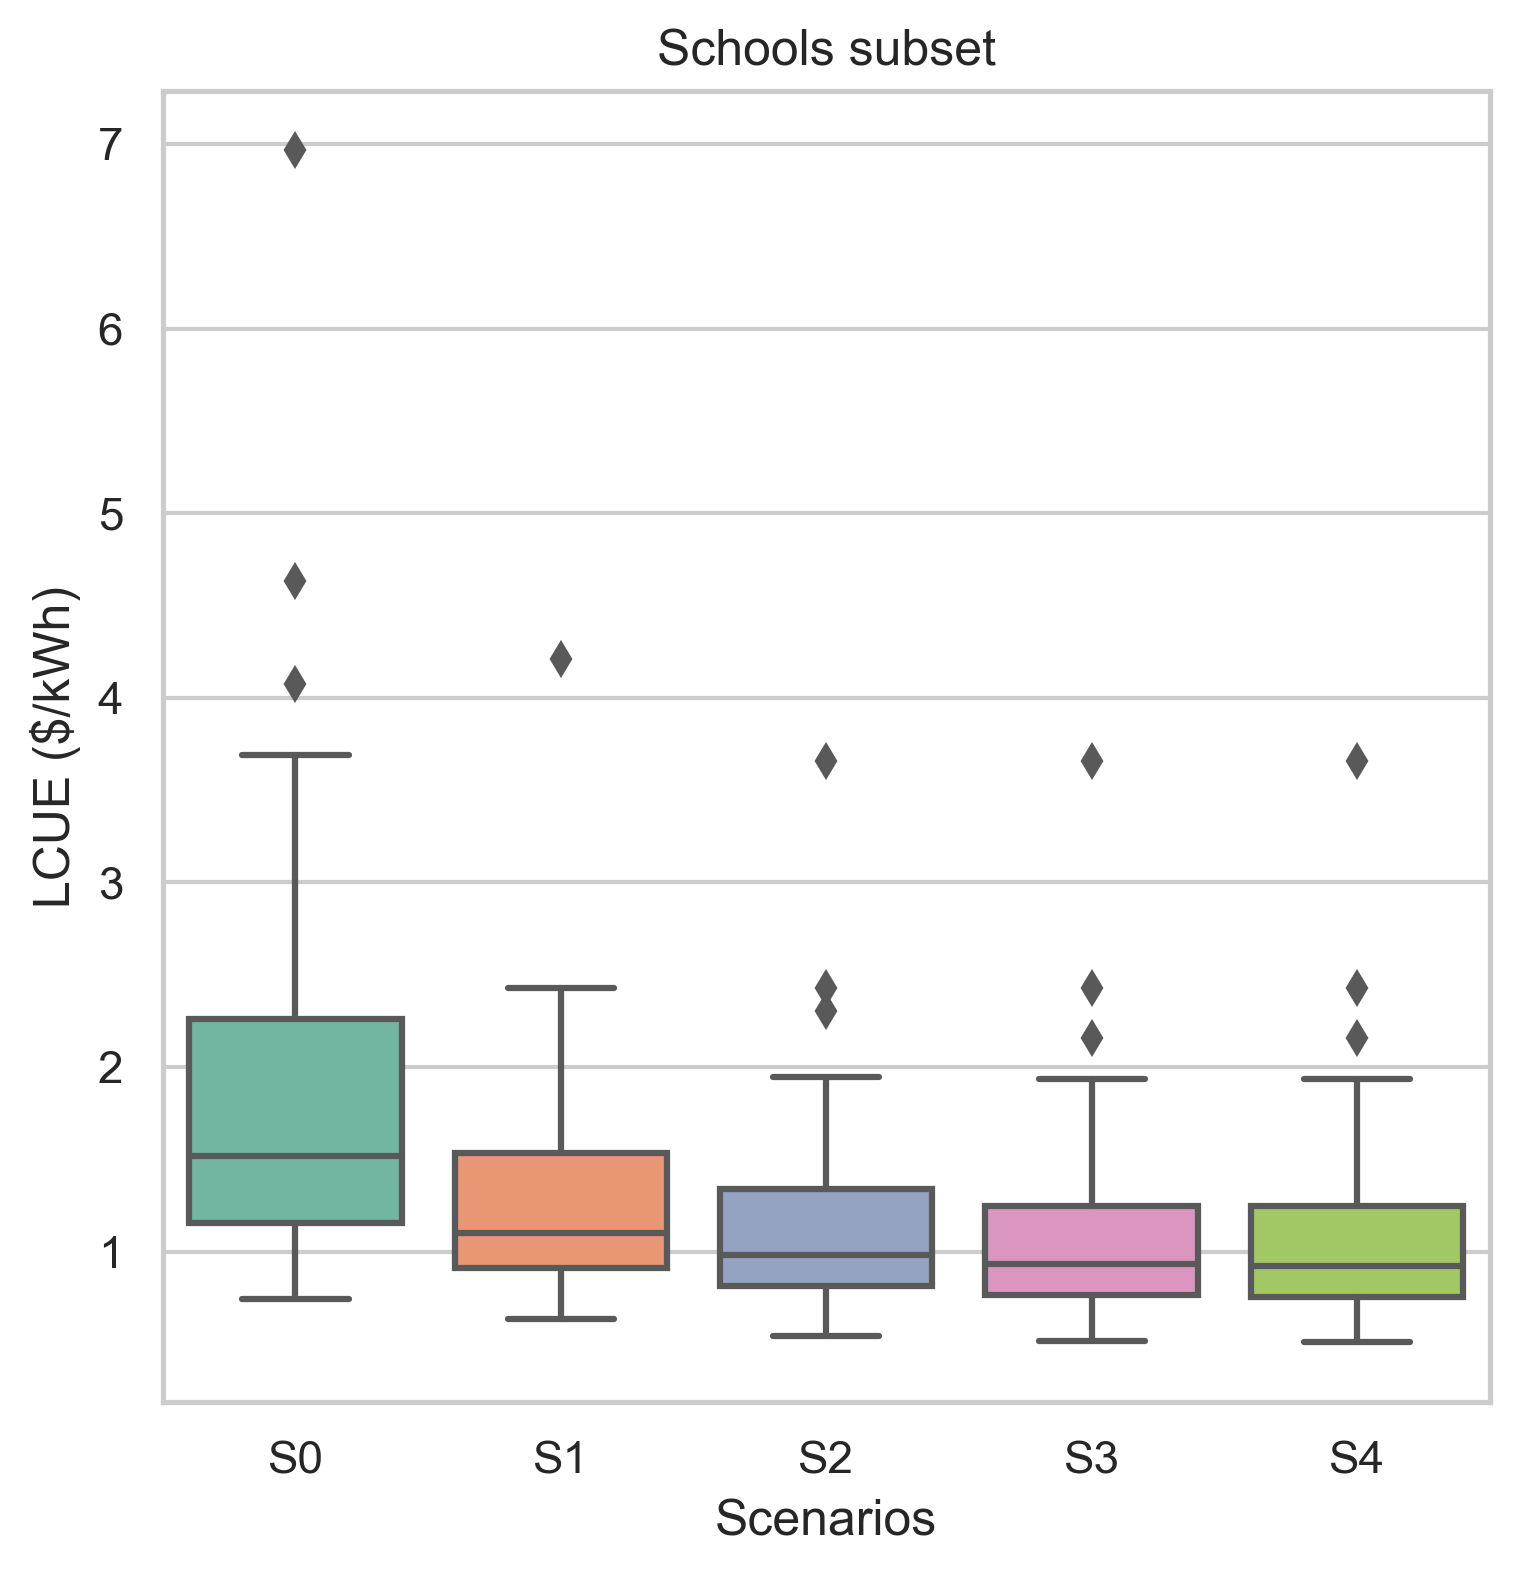

In [15]:
# Plot subset of LCUE schools (n=111)
g = sns.catplot(
    data=lcue_subset_schools, kind= "box", palette= "Set2")
g.set(xlabel= "Scenarios", ylabel= "LCUE ($/kWh)")
#g.set(ylim=(0, 3)) # to get rid of outlier
g.set_xticklabels(["S0", "S1", "S2", "S3", "S4"])
g.set(title="Schools subset")
sns.despine(top=False, right=False)

In [16]:
# NOW REPEAT FOR EMISSIONS INTENSITY 
# Imports/reads csv of Emissions intensity of S0-S4 (created with another code)
emi_s0_s4 = pd.read_csv("emi_s0_s4.csv")

In [17]:
# Creates new df including only subset of sites on subset_list:
emi_subset = emi_s0_s4[emi_s0_s4["Site_name"].isin(subset_list)]
emi_subset # to show in Jupyter

,Site_name,County,Institution,S0_EI,S1_EI,S2_EI,S3_EI,S4_EI
0,AIC_Nadoto_Primary_School,Turkana,School,565.902,600.363,488.643,387.168,302.255
1,AIC_Nayanaekaton_Primary_School,Turkana,School,723.681,391.618,362.657,249.202,249.202
2,A_IC_Gangani_Primary_School,Kwale,School,422.405,228.788,228.788,222.381,222.381
3,Abagarse_Primary_School,Isiolo,School,796.500,304.466,273.643,273.643,273.643
4,Akadeli_Primary_School,Isiolo,School,335.192,248.576,221.612,170.599,170.599
...,...,...,...,...,...,...,...,...
159,Uhuru_Primary_School,Isiolo,School,602.435,447.262,328.777,328.777,320.490
160,Vithunguni_Primary_School,Kilifi,School,745.296,434.474,285.587,258.590,258.590
161,Watala_Primary_School,Kilifi,School,645.173,680.054,502.408,485.376,412.548
164,Ziwani_Primary_School,Kilifi,School,803.239,596.233,471.562,449.643,449.643


In [18]:
emi_subset.info  # to check is only 124 rows or sites 

<bound method DataFrame.info of                            Site_name   County Institution    S0_EI    S1_EI  \
0          AIC_Nadoto_Primary_School  Turkana      School  565.902  600.363   
1    AIC_Nayanaekaton_Primary_School  Turkana      School  723.681  391.618   
2        A_IC_Gangani_Primary_School    Kwale      School  422.405  228.788   
3            Abagarse_Primary_School   Isiolo      School  796.500  304.466   
4             Akadeli_Primary_School   Isiolo      School  335.192  248.576   
..                               ...      ...         ...      ...      ...   
159             Uhuru_Primary_School   Isiolo      School  602.435  447.262   
160        Vithunguni_Primary_School   Kilifi      School  745.296  434.474   
161            Watala_Primary_School   Kilifi      School  645.173  680.054   
164            Ziwani_Primary_School   Kilifi      School  803.239  596.233   
165       Ziyaradundo_Primary_School    Kwale      School  245.795  270.957   

       S2_EI    S3_

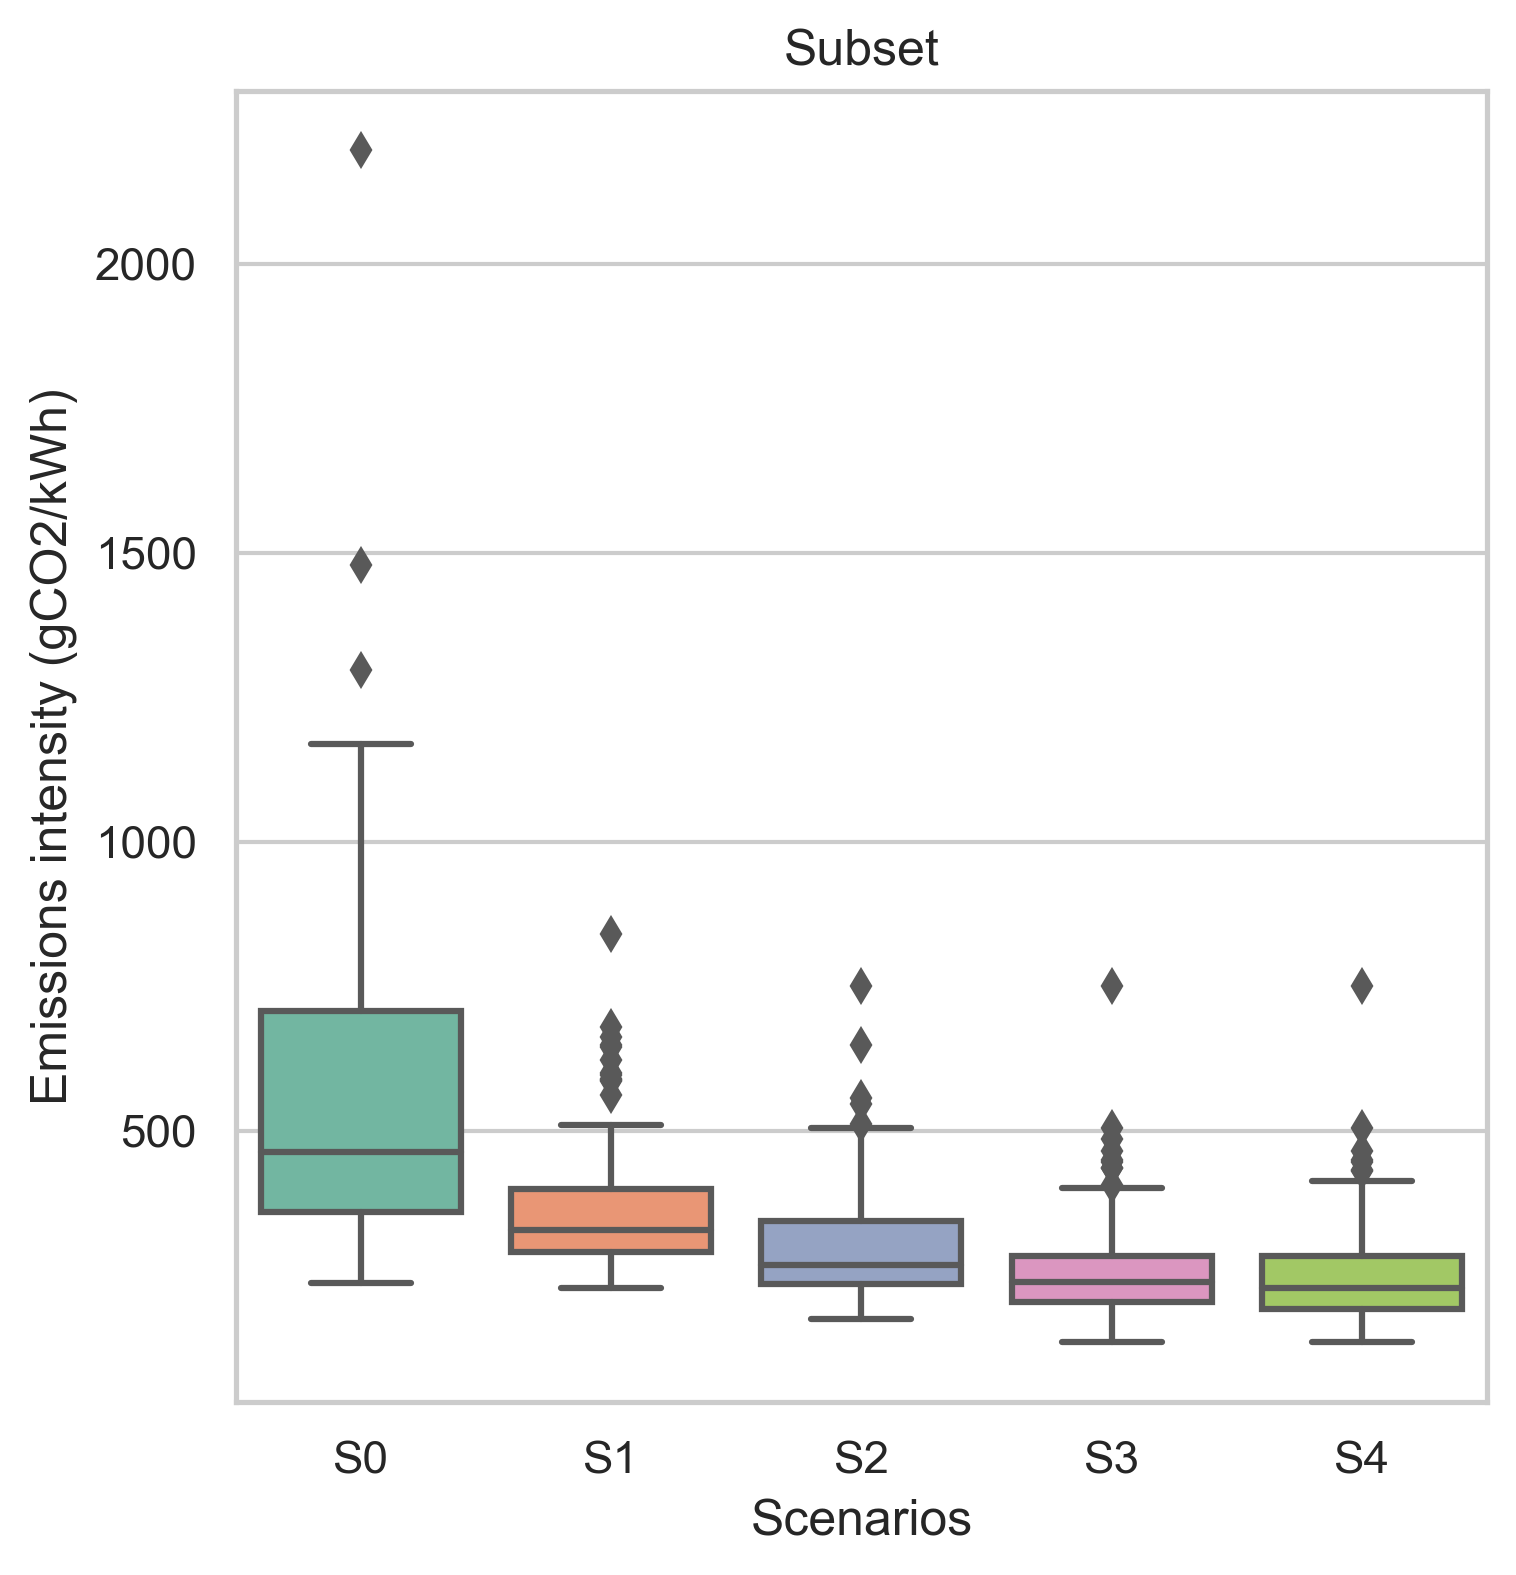

In [19]:
# Plot subset of Emissions_int sites that had Unmet_energy_fraction == 0 in S0 (124 sites)
g = sns.catplot(
    data=emi_subset, kind= "box", palette= "Set2")
g.set(xlabel= "Scenarios", ylabel= "Emissions intensity (gCO2/kWh)")
#g.set(ylim=(0, 3)) # to get rid of outlier
g.set_xticklabels(["S0", "S1", "S2", "S3", "S4"])
g.set(title="Subset")
sns.despine(top=False, right=False)

In [20]:
# Separate df by Institution type (by Clinics emissions intensity)
emi_subset_clinics = emi_subset[emi_subset.Institution != 'School']
emi_subset_clinics

,Site_name,County,Institution,S0_EI,S1_EI,S2_EI,S3_EI,S4_EI
13,Boyani_Dispensary,Kilifi,Clinic,348.000,262.819,186.794,133.966,133.966
16,Busa_Dispensary,Kwale,Clinic,391.918,281.034,258.554,192.212,160.489
18,Chingombero_Dispensary,Kwale,Clinic,469.706,317.942,266.837,228.708,198.233
39,Isiolo_Samburu_Complex_Dispensary,Isiolo,Clinic,431.285,381.616,303.232,261.679,231.995
54,Kavunyalo_Dispensary,Kilifi,Clinic,263.786,273.499,195.600,174.530,135.210
78,Mabesheni_Dispensary,Kwale,Clinic,301.803,227.878,174.523,149.125,149.125
86,Makamini_Dispensary,Kwale,Clinic,796.146,329.808,282.412,209.738,209.738
98,Mazola_Dispensary,Kwale,Clinic,578.164,332.146,264.019,176.311,170.629
102,Mbulia_Dispensary,Taita_Taveta,Clinic,863.188,252.766,237.213,237.213,178.291
120,Mtumwa_Dispensary,Kwale,Clinic,294.782,304.263,233.240,192.997,192.966


In [21]:
# returns Emissions intensity df of only clinics (13 sites/count)
emi_subset_clinics.describe().round(3)

,S0_EI,S1_EI,S2_EI,S3_EI,S4_EI
count,13.000,13.000,13.000,13.000,13.000
mean,439.882,287.592,235.931,190.853,172.337
std,192.999,43.933,38.572,37.396,29.002
min,263.786,227.878,174.523,133.966,133.966
25%,316.042,252.766,208.227,161.861,157.787
50%,348.000,281.034,237.213,192.212,161.861
75%,469.706,317.942,264.019,209.738,192.966
max,863.188,381.616,303.232,261.679,231.995


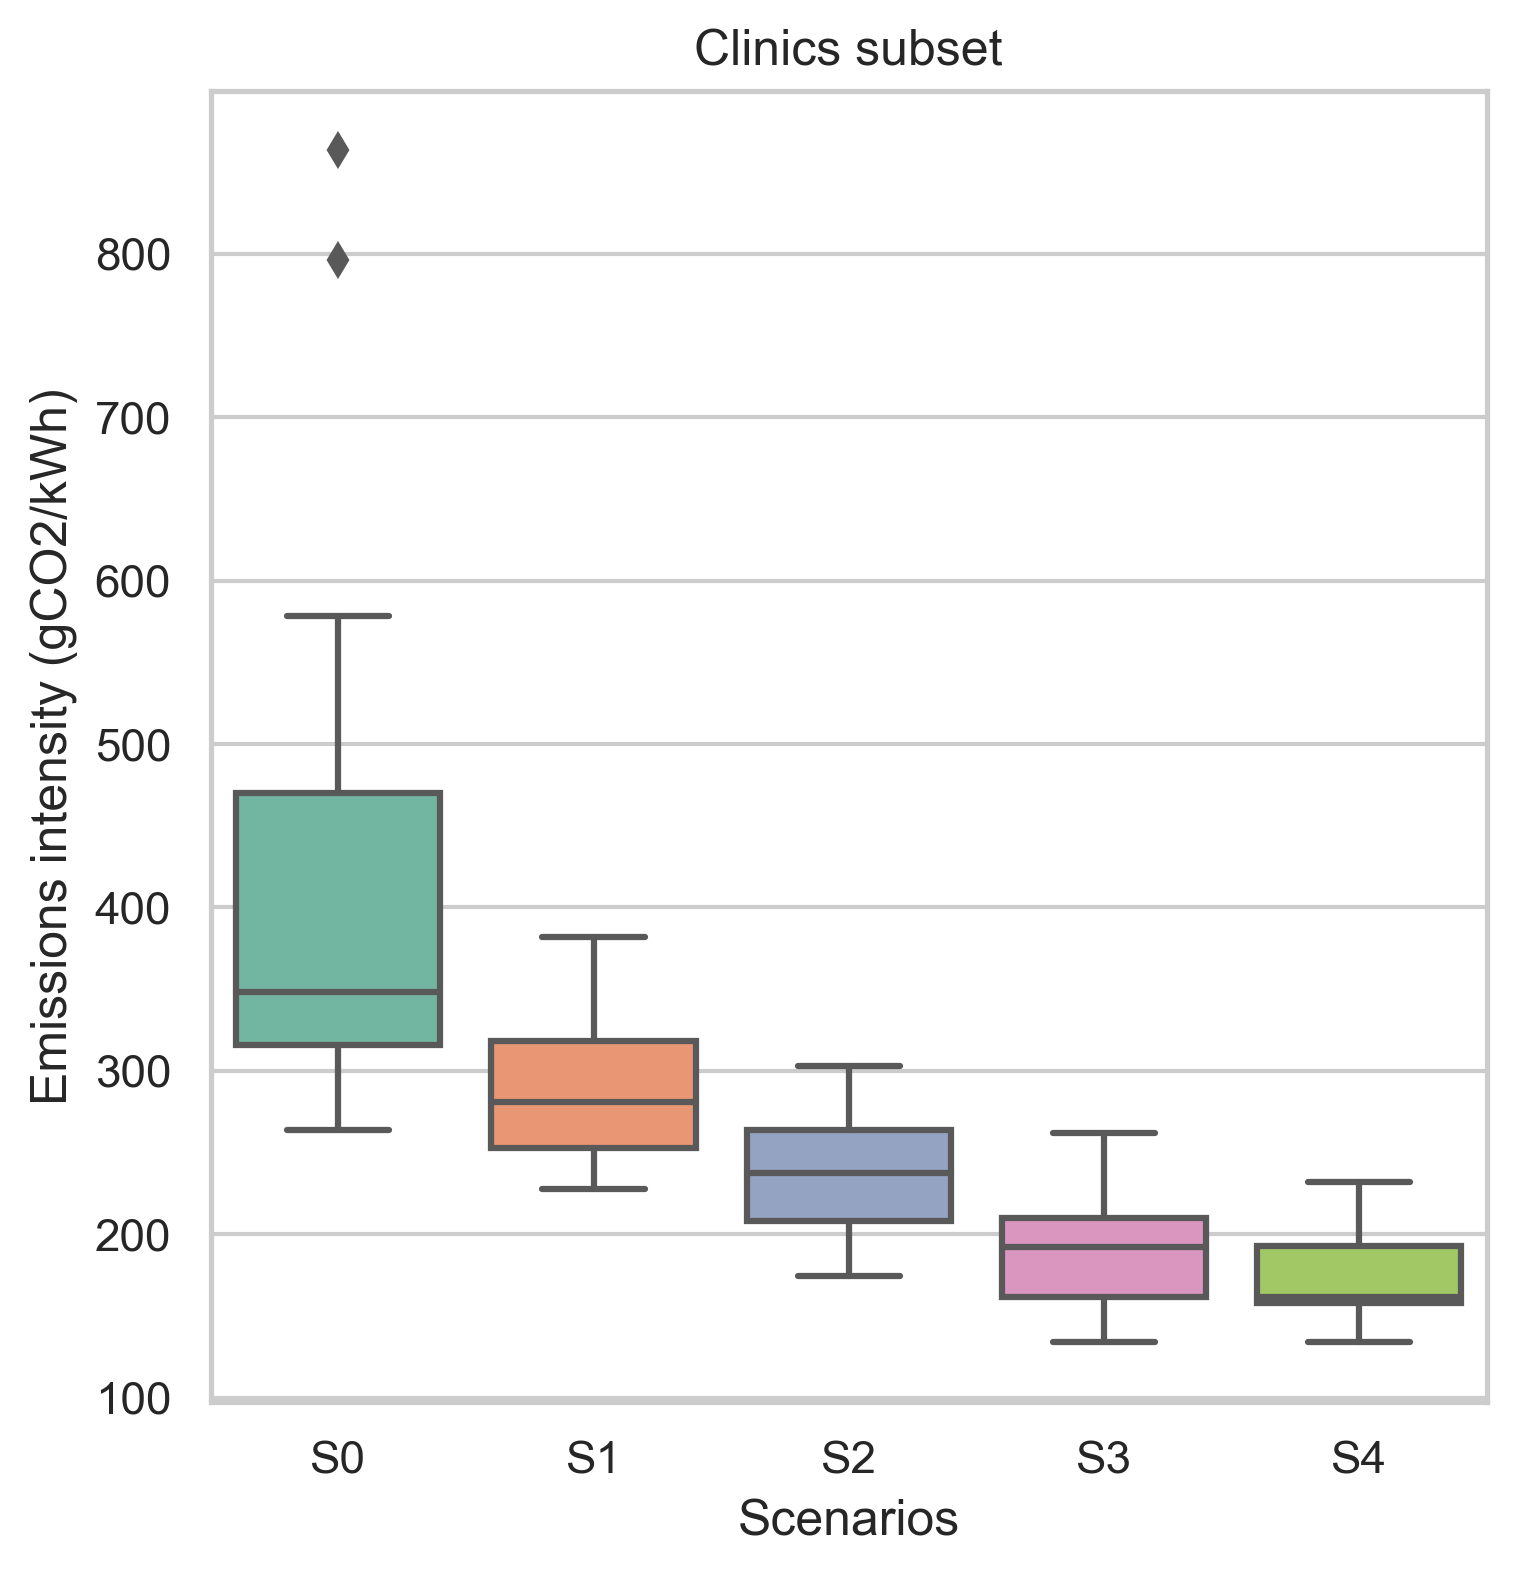

In [22]:
# Plot subset of Emissions_int clinics that had Unmet_energy_fraction == 0 in S0 (124 sites)
# Plot subset of Emissions_int clinics (n=13)
g = sns.catplot(
    data=emi_subset_clinics, kind= "box", palette= "Set2")
g.set(xlabel= "Scenarios", ylabel= "Emissions intensity (gCO2/kWh)")
#g.set(ylim=(0, 3)) # to get rid of outlier
g.set_xticklabels(["S0", "S1", "S2", "S3", "S4"])
g.set(title="Clinics subset")
sns.despine(top=False, right=False)

In [23]:
# to separate df by Institution type (by Schools Emissions intensity)
emi_subset_schools = emi_subset[emi_subset.Institution != 'Clinic']

# returns Emissions intensity df of only schools (111 sites/count)
emi_subset_schools.describe().round(3)

,S0_EI,S1_EI,S2_EI,S3_EI,S4_EI
count,111.000,111.000,111.000,111.000,111.000
mean,569.007,373.042,308.479,268.508,258.236
std,297.077,112.155,103.517,90.437,91.014
min,236.326,228.788,186.743,158.073,136.479
25%,366.664,303.750,236.514,206.373,195.642
50%,480.530,334.793,274.697,246.742,235.030
75%,720.186,410.486,361.418,294.186,292.146
max,2195.912,839.351,749.673,749.673,749.673


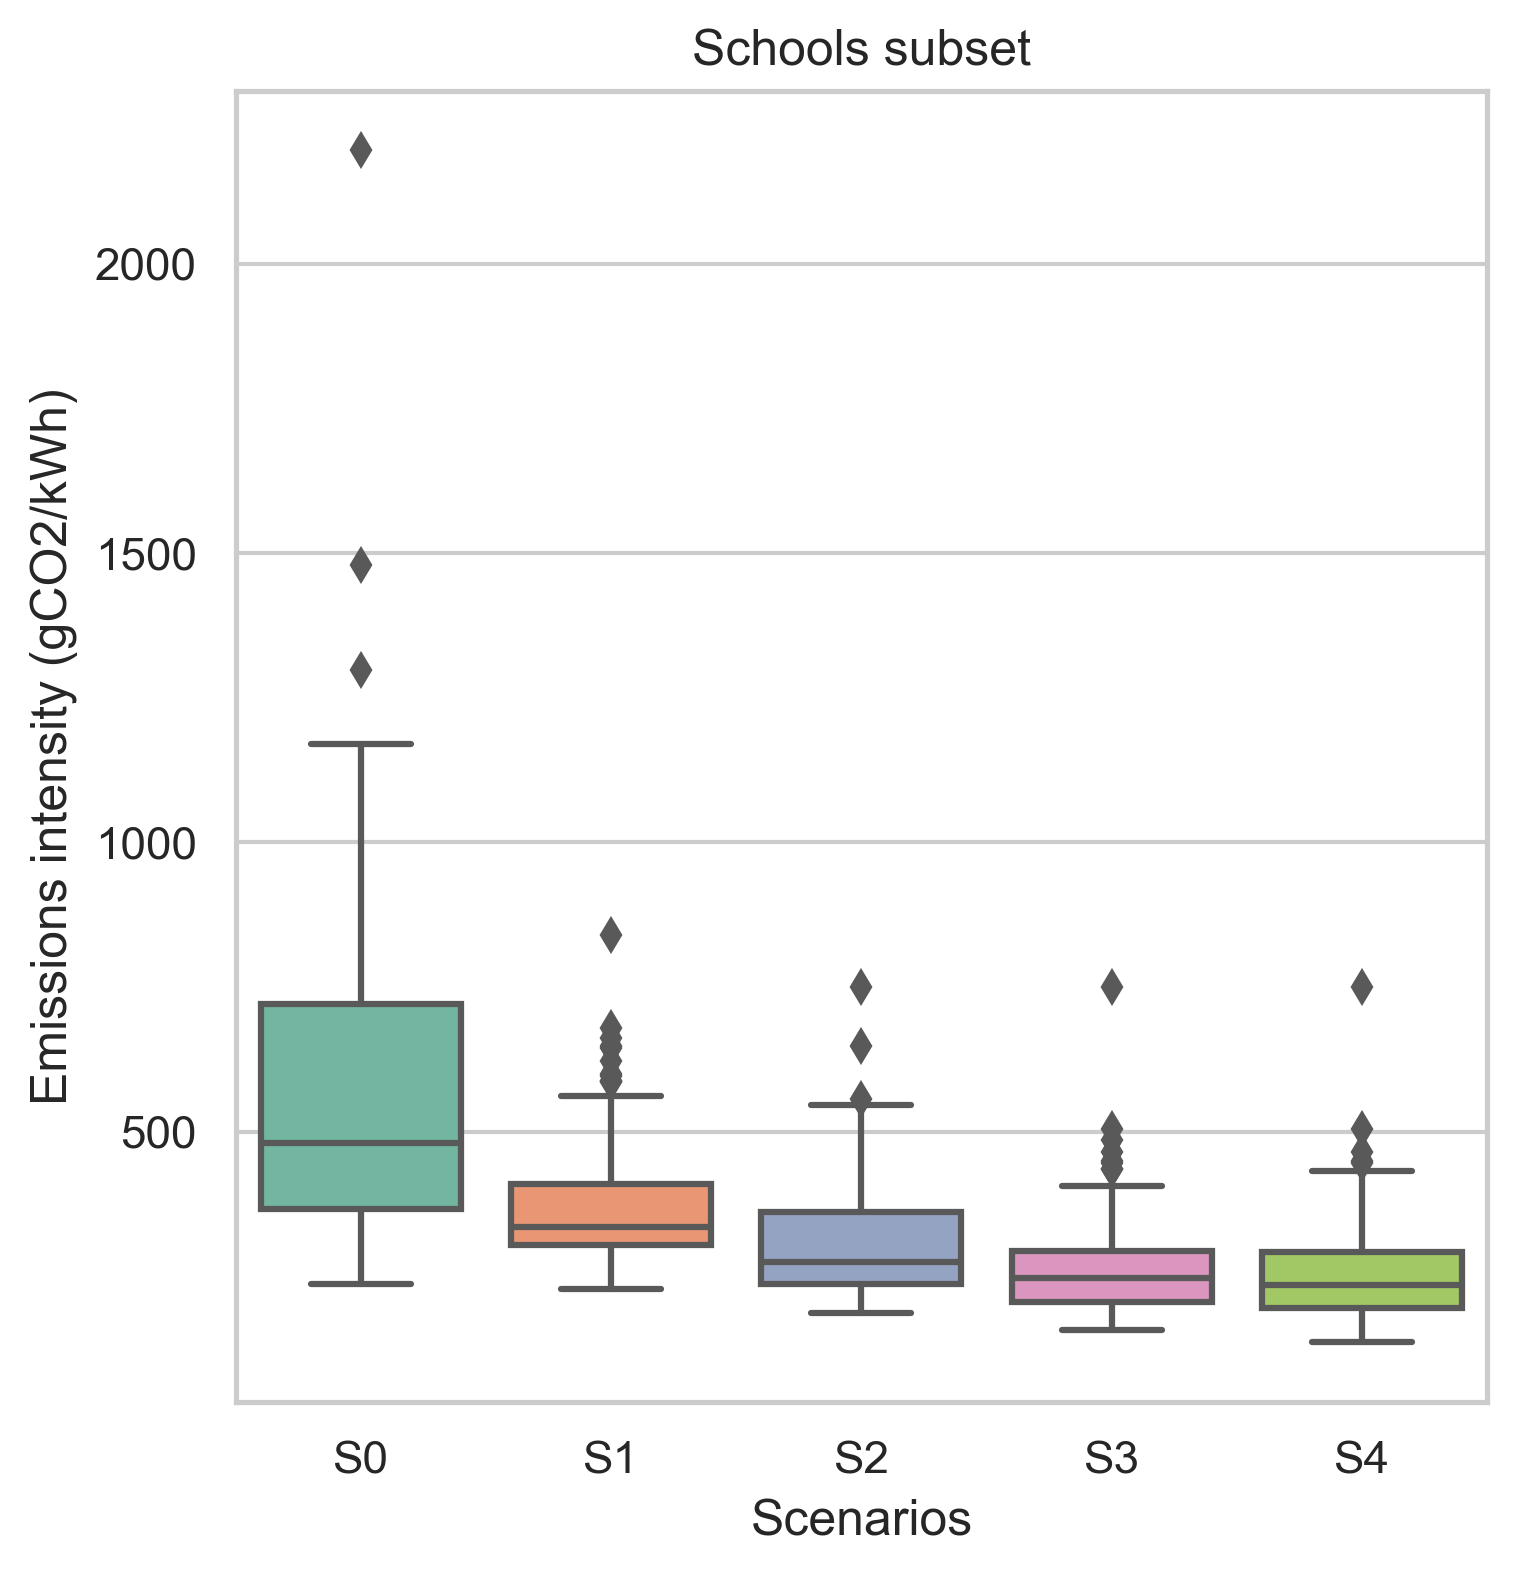

In [24]:
# Plot subset of Emissions_int schools that had Unmet_energy_fraction == 0 in S0 (124 sites)
# Plot subset of Emissions_int schools (n=111)
g = sns.catplot(
    data=emi_subset_schools, kind= "box", palette= "Set2")
g.set(xlabel= "Scenarios", ylabel= "Emissions intensity (gCO2/kWh)")
#g.set(ylim=(0, 3)) # to get rid of outlier
g.set_xticklabels(["S0", "S1", "S2", "S3", "S4"])
g.set(title="Schools subset")
sns.despine(top=False, right=False)

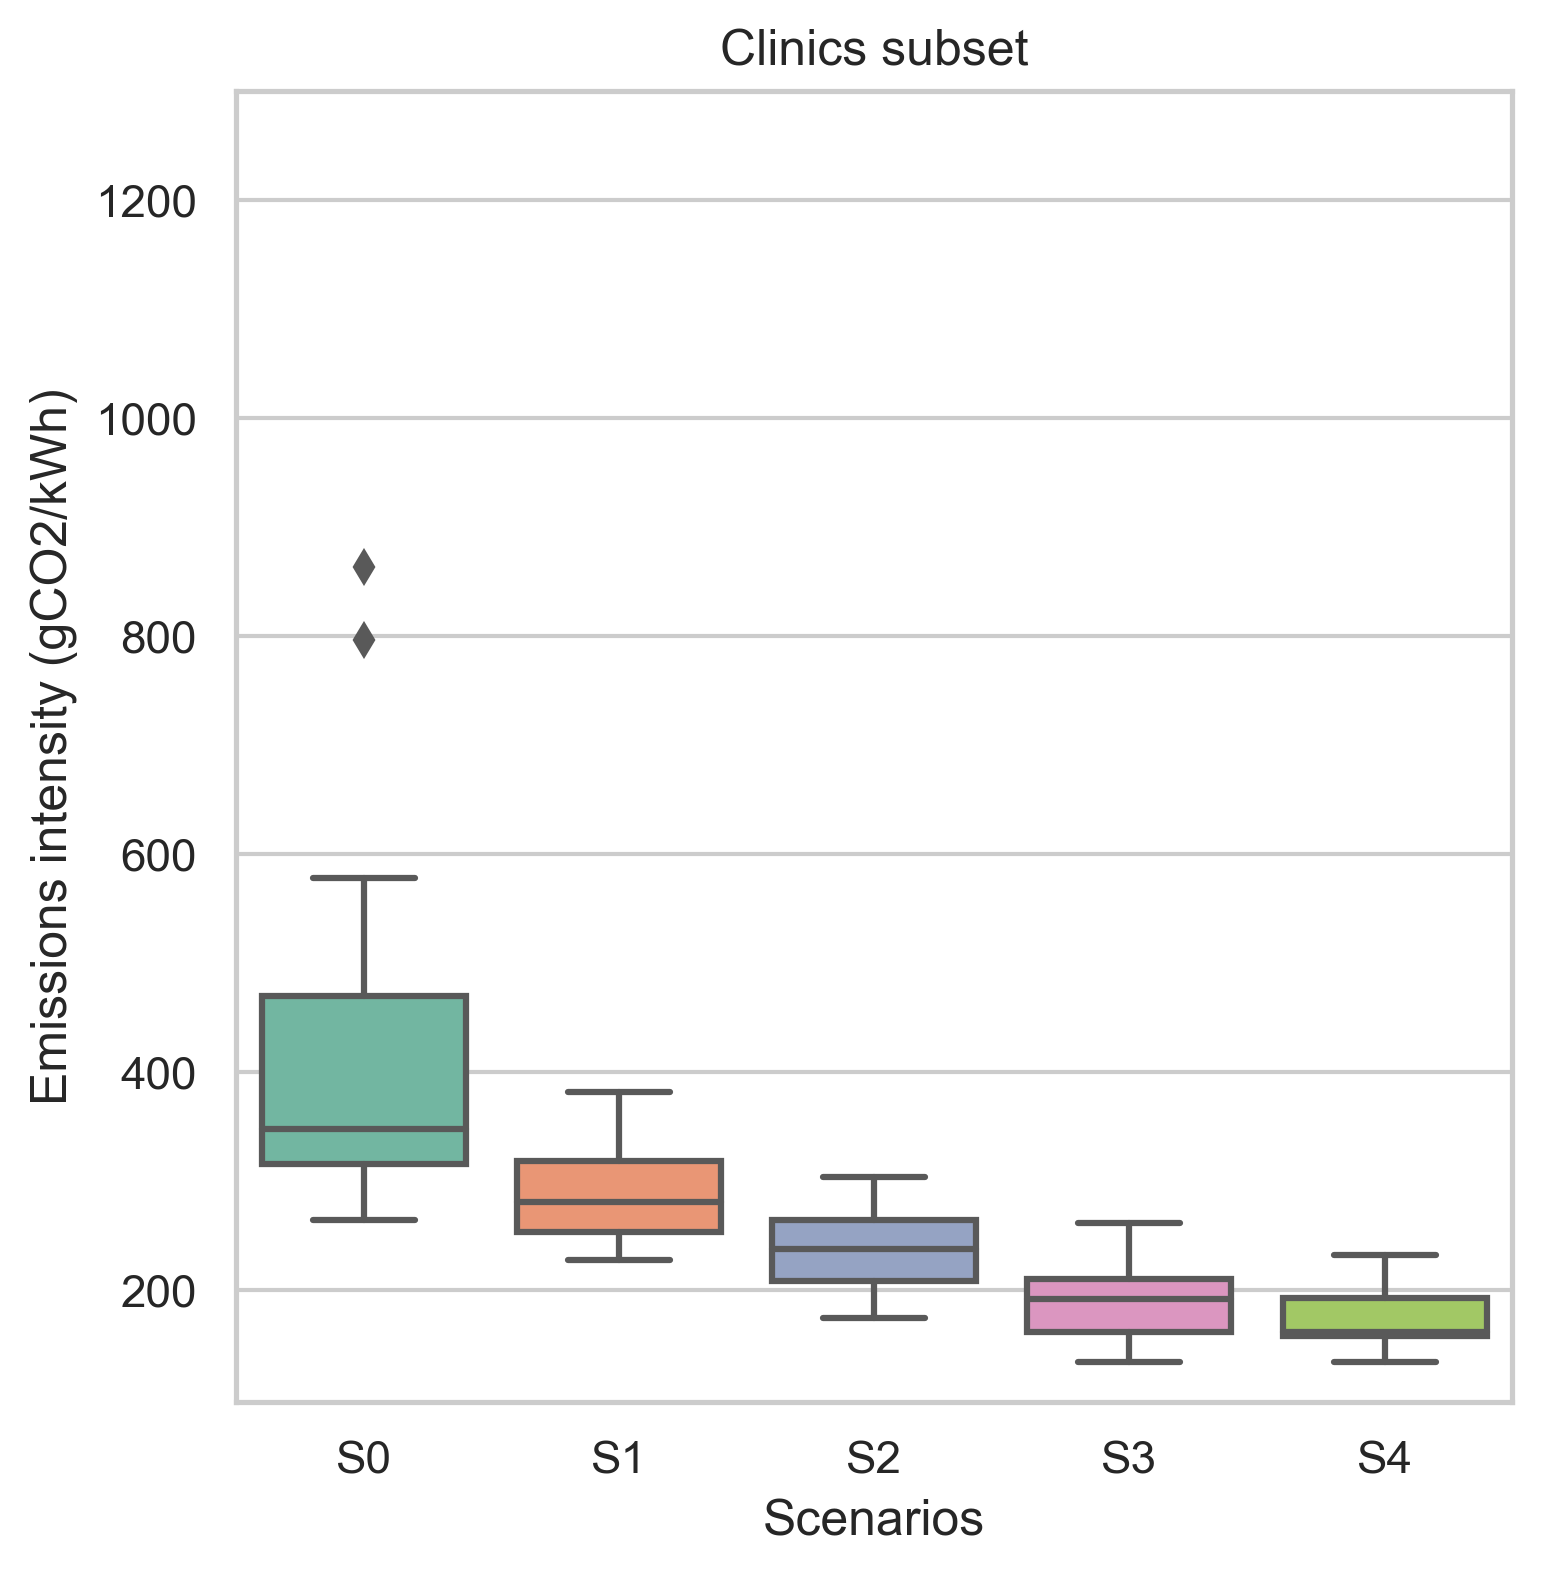

In [25]:
# Extending y-axis to compare them with previous boxplots with all 166 sites (not only subset)
# See 'emissions_s0-s4_plots' (Jupyter)

# Plot subset of Emissions_int clinics that had Unmet_energy_fraction == 0 in S0 (124 sites)
# Plot subset of Emissions_int clinics (n=13)
g = sns.catplot(
    data=emi_subset_clinics, kind= "box", palette= "Set2")
g.set(xlabel= "Scenarios", ylabel= "Emissions intensity (gCO2/kWh)")
g.set(ylim=(None, 1300)) # to extend axis to compare with previous boxplot
g.set_xticklabels(["S0", "S1", "S2", "S3", "S4"])
g.set(title="Clinics subset")
sns.despine(top=False, right=False)

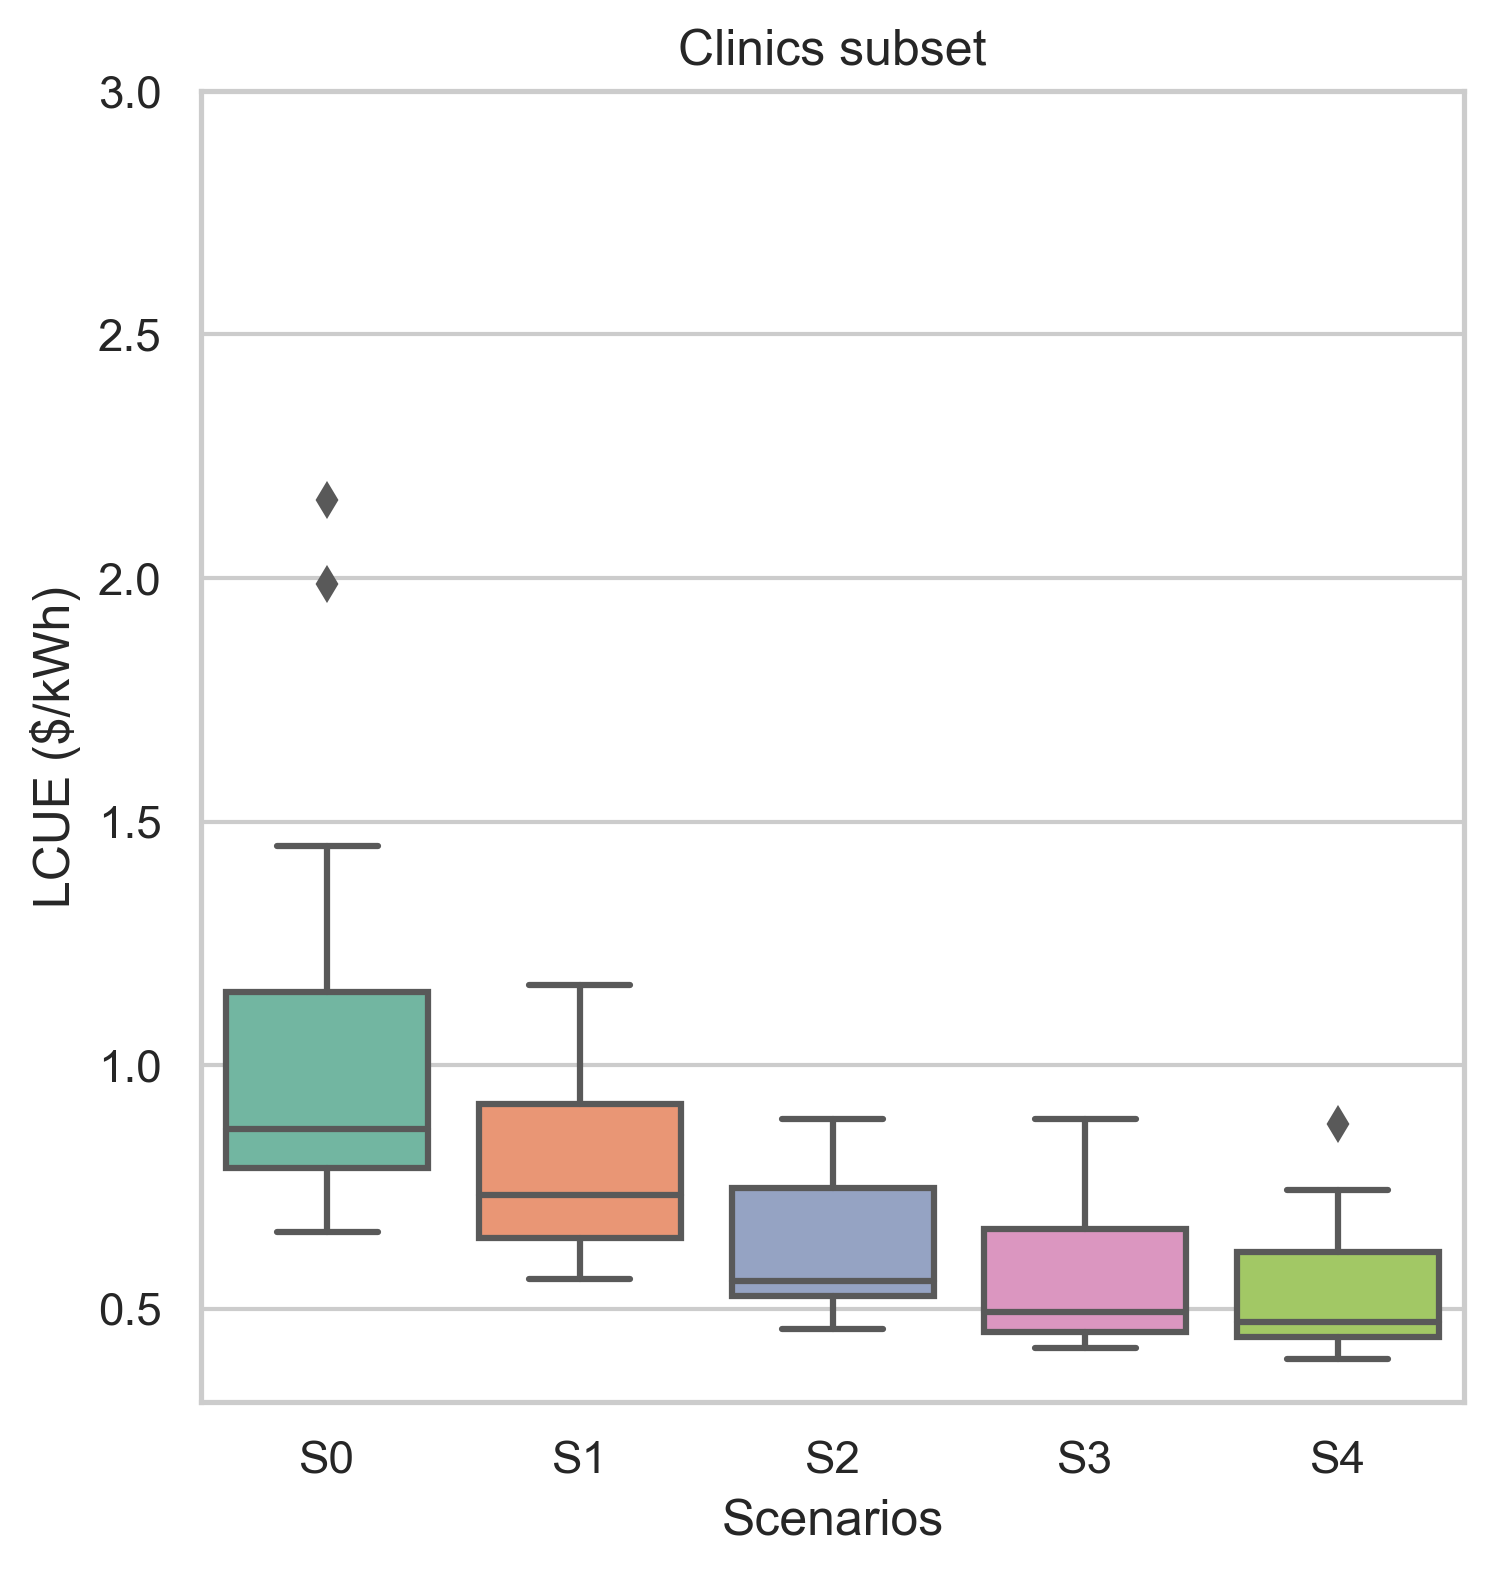

In [27]:
# Extending y-axis to compare them with previous boxplots with all 166 sites (not only subset)
# See 'lcue_s0-s4_plots' (Jupyter)

# Plot subset of LCUE clinics (n=13)
g = sns.catplot(
    data=lcue_subset_clinics, kind= "box", palette= "Set2")  # change to violin
g.set(xlabel= "Scenarios", ylabel= "LCUE ($/kWh)")
g.set(ylim=(None, 3)) # to extend axis to compare with previous boxplot
g.set_xticklabels(["S0", "S1", "S2", "S3", "S4"])
g.set(title="Clinics subset")
sns.despine(top=False, right=False)

In [ ]:
# to save the figure (just add this at the end of the plot)
#plt.savefig("name.png", facecolor="white", transparent=False, dpi=300, bbox_inches="tight")
#plt.show()